# **Regression Task**

---



Details of dataset:

The New York City Airbnb Open Data dataset, sourced from Kaggle, contains 48,896 records and 16 columns representing Airbnb listings across the five boroughs of New York City. The target variable for this regression task is price, a continuous numerical value representing the nightly rental cost.

Dataset link: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

Author: Dgomonov

I choose this dataset because of following key features.

Key features include:
•	Numerical variables: price, minimum nights, number of reviews, reviews per month, availability_365, latitude, longitude

•	Categorical variables: neighbourhood_group, neighbourhood, room_type

•	Identifier variables: id, host_id, name, host_name

•	Date variable: last_review

**Connection to Sustainable Development Goals (SDGs)**

This project aligns with:

•	SDG 11: Sustainable Cities and Communities, by supporting fair and transparent housing markets and helping city planners understand short-term rental pricing impacts on urban housing.

•	SDG 8: Decent Work and Economic Growth, by enabling hosts to price listings competitively and sustainably while promoting responsible tourism.


In [2]:
# Regression Task EDA - Airbnb NYC


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df_reg = pd.read_csv("/content/drive/MyDrive/Final Assessment AI/AB_NYC_2019.csv")


In [3]:
# 2. Quick overview
print("First 5 rows:")
print(df_reg.head())

print("\nDataset Info:")
print(df_reg.info())

print("\nSummary Statistics (Numeric Features):")
print(df_reg.describe())

First 5 rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1         

In [4]:
# 3. Handle missing values
# 'reviews_per_month' has NaN, fill with 0
df_reg['reviews_per_month'].fillna(0, inplace=True)

# Optional: drop columns not needed for regression
df_reg.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

print("\nMissing values after cleaning:")
print(df_reg.isnull().sum())


Missing values after cleaning:
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


/tmp/ipython-input-1709484479.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reg['reviews_per_month'].fillna(0, inplace=True)


In [5]:
# 4. Basic distributions
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights',
                    'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

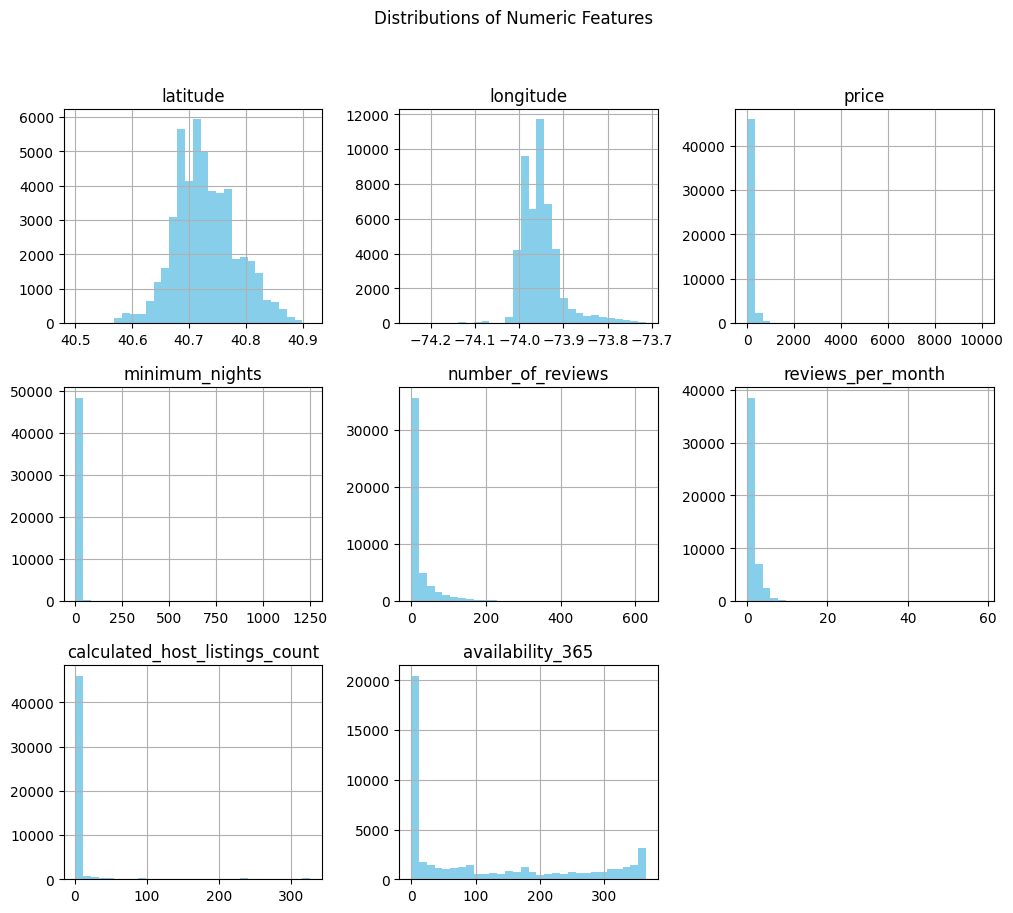

/tmp/ipython-input-2001508171.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reg, x='neighbourhood_group', palette='Set2')


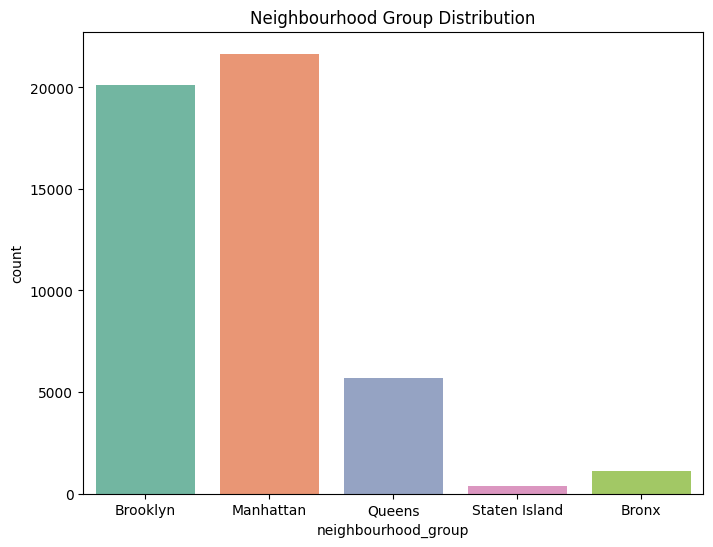

/tmp/ipython-input-2001508171.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reg, x='room_type', palette='Set3')


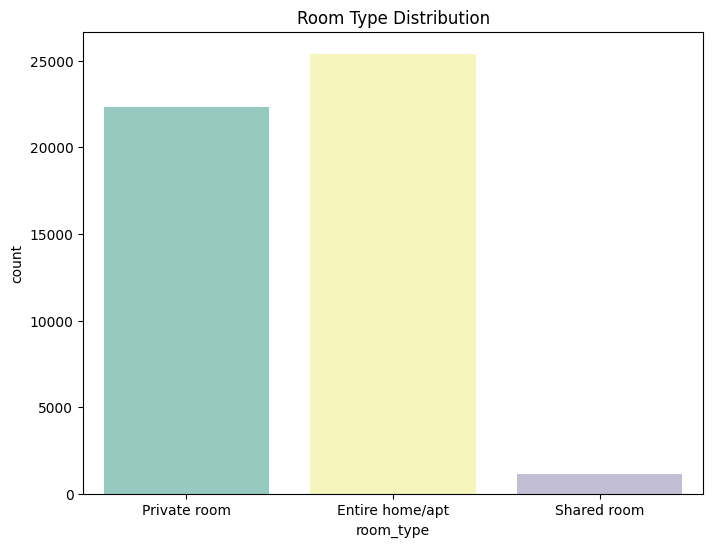

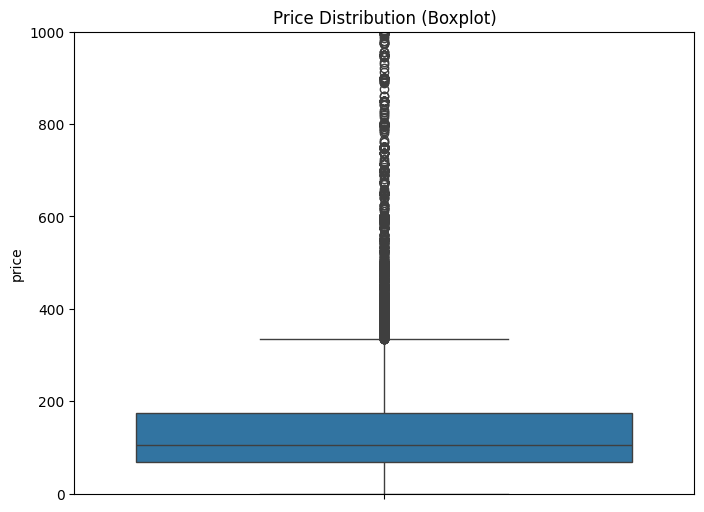

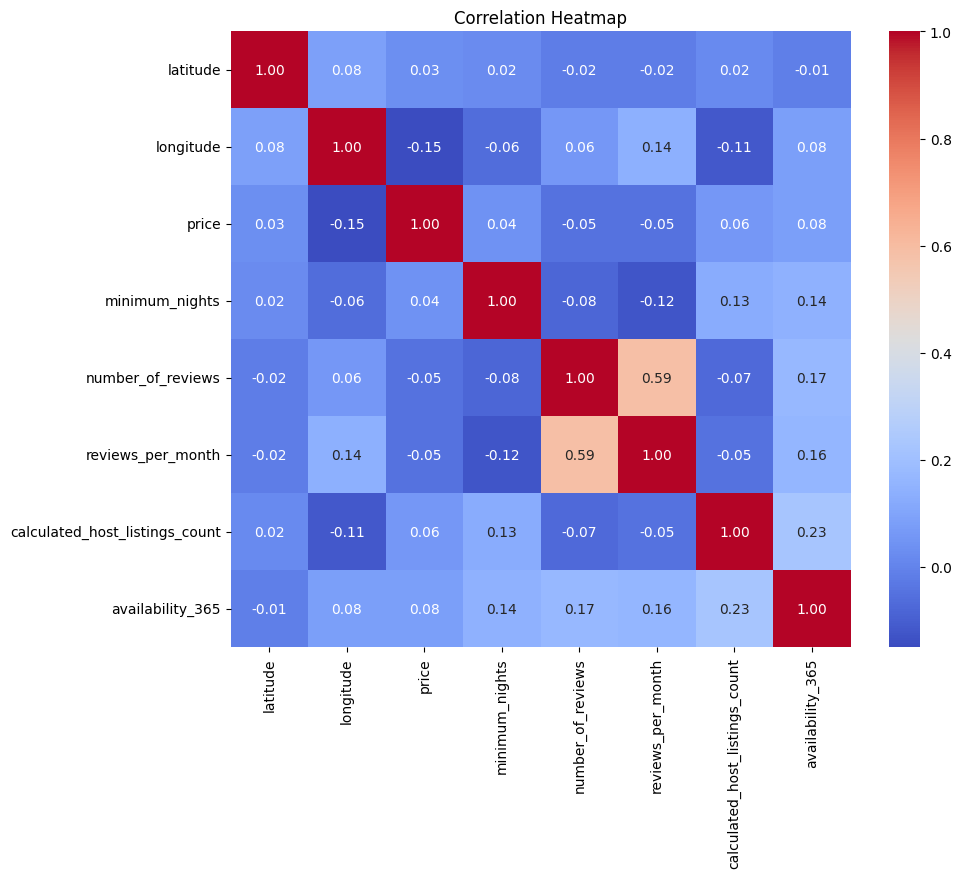

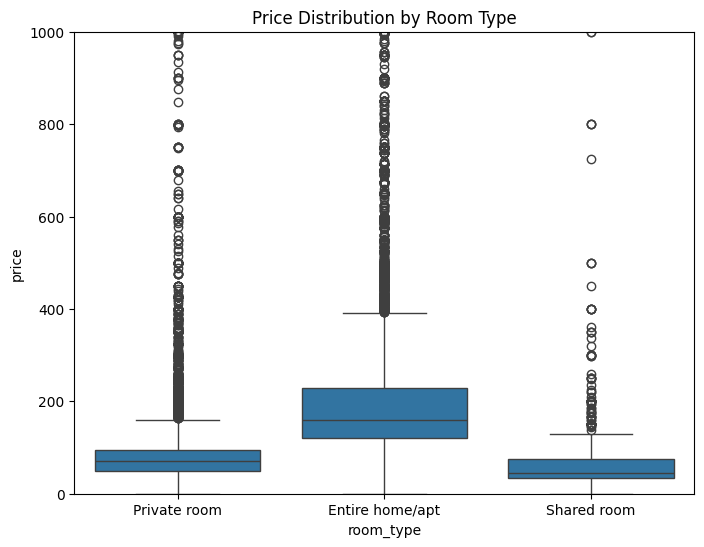

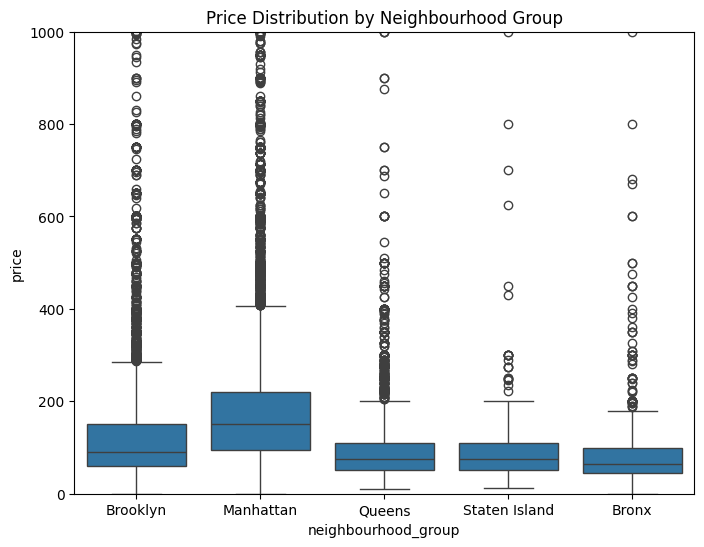


Insights from EDA:
- Most listings have prices below $500; extreme high prices are outliers.
- Manhattan listings are generally more expensive than Brooklyn or Queens.
- Entire homes/apartments are priced higher than private or shared rooms.
- Numeric features like 'number_of_reviews' and 'availability_365' are weakly correlated with price.


In [6]:
# a) Histograms for numeric features
df_reg[numeric_features].hist(bins=30, figsize=(12,10), color='skyblue')
plt.suptitle("Distributions of Numeric Features")
plt.show()

# b) Count plots for categorical features
plt.figure(figsize=(8,6))
sns.countplot(data=df_reg, x='neighbourhood_group', palette='Set2')
plt.title('Neighbourhood Group Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df_reg, x='room_type', palette='Set3')
plt.title('Room Type Distribution')
plt.show()

# 5. Boxplot to detect outliers in price
plt.figure(figsize=(8,6))
sns.boxplot(y='price', data=df_reg)
plt.title('Price Distribution (Boxplot)')
plt.ylim(0, 1000)  # Optional: focus on most prices
plt.show()

# 6. Correlation heatmap (only numeric features)
plt.figure(figsize=(10,8))
sns.heatmap(df_reg[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 7. Price vs Room Type
plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price', data=df_reg)
plt.title('Price Distribution by Room Type')
plt.ylim(0, 1000)  # focus on typical price range
plt.show()

# 8. Price vs Neighbourhood Group
plt.figure(figsize=(8,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_reg)
plt.title('Price Distribution by Neighbourhood Group')
plt.ylim(0, 1000)
plt.show()

# 9. Insights (example, you can modify based on your observations)
print("\nInsights from EDA:")
print("- Most listings have prices below $500; extreme high prices are outliers.")
print("- Manhattan listings are generally more expensive than Brooklyn or Queens.")
print("- Entire homes/apartments are priced higher than private or shared rooms.")
print("- Numeric features like 'number_of_reviews' and 'availability_365' are weakly correlated with price.")

In [7]:
# Task 2: Neural Network Regression (MLP)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Target column: price

X = df_reg.drop('price', axis=1)
y = df_reg['price']

In [9]:
# Preprocessing: Encoding + Scaling

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [10]:
# Train–Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


In [11]:
# Neural Network Model (MLP Regressor)

mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(64, 32),   # Network architecture
    activation='relu',             # Activation function
    solver='adam',                 # Optimizer
    max_iter=500,
    random_state=42
)

# Train model
mlp_regressor.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [12]:
# Evaluation

y_train_pred = mlp_regressor.predict(X_train)
y_test_pred = mlp_regressor.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Results

print("Neural Network Regression Performance\n")

print(f"Training Set -> MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.3f}")
print(f"Test Set     -> MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.3f}")

Neural Network Regression Performance

Training Set -> MSE: 39470.32, RMSE: 198.67, R²: 0.353
Test Set     -> MSE: 43127.49, RMSE: 207.67, R²: 0.025


| Dataset      | MSE       | RMSE   | R² Score |
| ------------ | --------- | ------ | -------- |
| Training Set | 39,470.32 | 198.67 | 0.353    |
| Test Set     | 43,127.49 | 207.67 | 0.025    |


In [13]:
# Task -3 Build Primary Machine Learning Models (Two Classical ML Models)

We will use:

Model 1: Linear Regression (baseline, interpretable)

Model 2: Random Forest Regressor (non-linear, stronger)

In [14]:
# Task 3: Primary Machine Learning Models (Regression)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [15]:
# 1. Features and target
X = df_reg.drop('price', axis=1)
y = df_reg['price']

In [16]:
# 2. Preprocessing: numeric scaling + categorical encoding
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [17]:
# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [18]:
# 4. Build Models

# a) Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# b) Random Forest Regressorh
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [19]:
# 5. Evaluate models
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Linear Regression metrics
train_mse_lr, train_rmse_lr, train_r2_lr = regression_metrics(y_train, y_train_pred_lr)
test_mse_lr, test_rmse_lr, test_r2_lr = regression_metrics(y_test, y_test_pred_lr)

# Random Forest metrics
train_mse_rf, train_rmse_rf, train_r2_rf = regression_metrics(y_train, y_train_pred_rf)
test_mse_rf, test_rmse_rf, test_r2_rf = regression_metrics(y_test, y_test_pred_rf)

# 6. Print results
print("Linear Regression Performance")
print(f"Training Set -> MSE: {train_mse_lr:.2f}, RMSE: {train_rmse_lr:.2f}, R²: {train_r2_lr:.3f}")
print(f"Test Set     -> MSE: {test_mse_lr:.2f}, RMSE: {test_rmse_lr:.2f}, R²: {test_r2_lr:.3f}\n")

print("Random Forest Regression Performance")
print(f"Training Set -> MSE: {train_mse_rf:.2f}, RMSE: {train_rmse_rf:.2f}, R²: {train_r2_rf:.3f}")
print(f"Test Set     -> MSE: {test_mse_rf:.2f}, RMSE: {test_rmse_rf:.2f}, R²: {test_r2_rf:.3f}")

Linear Regression Performance
Training Set -> MSE: 54086.62, RMSE: 232.57, R²: 0.114
Test Set     -> MSE: 38236.95, RMSE: 195.54, R²: 0.136

Random Forest Regression Performance
Training Set -> MSE: 6983.49, RMSE: 83.57, R²: 0.886
Test Set     -> MSE: 37405.93, RMSE: 193.41, R²: 0.154


| Model                | Train MSE | Train RMSE | Train R² | Test MSE | Test RMSE | Test R² |
| -------------------- | --------- | ---------- | -------- | -------- | --------- | ------- |
| Neural Network (MLP) | 39470.32  | 198.67     | 0.353    | 43127.49 | 207.67    | 0.025   |
| Linear Regression    | 54086.62  | 232.57     | 0.114    | 38236.95 | 195.54    | 0.136   |
| Random Forest        | 6983.49   | 83.57      | 0.886    | 37405.93 | 193.41    | 0.154   |

Random Forest clearly overfits the training data (Train R² = 0.886, but Test R² = 0.154), meaning it captures training patterns very well but generalizes poorly.

Neural Network has moderate training fit (R² = 0.353) but poor test performance (R² = 0.025), also indicating underfitting or model instability.

Linear Regression performs worst on training but slightly better on test compared to Neural Network in terms of R² (0.136 > 0.025).

 Conclusion: For this dataset, all models struggle to predict price accurately (low R² on test sets). Random Forest captures training patterns best but generalizes poorly. Linear Regression is simplest and slightly more stable.

In [20]:
# Task 4 - Hyperparameter Optimization with Cross-Validation

Key Hyperparameters

Linear Regression:

Usually has very few hyperparameters. You can optimize fit_intercept (True/False) and normalize (deprecated in latest versions, handled via preprocessing).

Often, Linear Regression doesn’t require heavy tuning, so CV is mostly trivial.

Random Forest Regressor:

n_estimators: Number of trees (e.g., 100, 200, 500)

max_depth: Maximum depth of each tree (e.g., None, 10, 20)

min_samples_split: Minimum samples required to split a node (e.g., 2, 5, 10)

min_samples_leaf: Minimum samples required at a leaf (e.g., 1, 2, 4)

max_features: Number of features considered at each split (e.g., 'auto', 'sqrt', 'log2')

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Use first 5000 rows for fast tuning
sample_size = 5000
X_sample = X_train[:sample_size]
y_sample = y_train[:sample_size]

# Convert to dense if needed
X_sample_dense = X_sample.toarray() if hasattr(X_sample, "toarray") else X_sample

# --- Linear Regression ---
lr = LinearRegression()
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr_rand = RandomizedSearchCV(lr, lr_params, n_iter=4, scoring='r2', cv=3, random_state=42)
lr_rand.fit(X_sample_dense, y_sample)

print("Best Linear Regression Hyperparameters:", lr_rand.best_params_)
print("Best CV R² Score:", lr_rand.best_score_)

# --- Random Forest ---
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [20, 50],        # fewer trees
    'max_depth': [5, 10],            # shallower
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_rand = RandomizedSearchCV(rf, rf_params, n_iter=3, scoring='r2', cv=3, random_state=42)
rf_rand.fit(X_sample_dense, y_sample)

print("Best Random Forest Hyperparameters:", rf_rand.best_params_)
print("Best CV R² Score:", rf_rand.best_score_)


Best Linear Regression Hyperparameters: {'positive': False, 'fit_intercept': True}
Best CV R² Score: 0.15884960268382908
Best Random Forest Hyperparameters: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
Best CV R² Score: 0.19508617689806507


| Model                       | Best Hyperparameters                                                          | Best CV R² Score |
| --------------------------- | ----------------------------------------------------------------------------- | ---------------- |
| **Linear Regression**       | `fit_intercept=True`, `positive=False`                                        | 0.159            |
| **Random Forest Regressor** | `n_estimators=20`, `min_samples_split=2`, `min_samples_leaf=1`, `max_depth=5` | 0.195            |

**Notes / Interpretation:**

Linear Regression: Simple linear model, low CV R² (0.159) indicates limited predictive power for Airbnb prices.

Random Forest Regressor: Non-linear ensemble model with tuned depth and tree parameters. Slightly better CV R² (0.195) shows it captures some additional variance in price compared to linear regression.

In [23]:
# Task 5 – Feature Selection

In [24]:
# ==============================
# Task 5: Feature Selection
# ==============================

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# --- Prepare data ---
X = df_reg.drop('price', axis=1)
y = df_reg['price']

# Preprocessing: Scaling + OneHotEncoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Convert to dense array (needed for some sklearn methods)
X_dense = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

# ==============================
# Linear Regression Feature Selection
# ==============================

lr = LinearRegression()
# Recursive Feature Elimination: select top 8 features
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_dense, y)

lr_selected_features = np.array(preprocessor.get_feature_names_out())[rfe.support_]
print("Selected features for Linear Regression:", lr_selected_features)

# ==============================
# Random Forest Feature Selection
# ==============================

# Take a 20% sample to speed up computation
sample_idx = np.random.choice(range(X_dense.shape[0]), size=int(0.2*X_dense.shape[0]), replace=False)
X_sample = X_dense[sample_idx]
y_sample = y.iloc[sample_idx]

rf = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=42)
rf.fit(X_sample, y_sample)

# Get top 8 features by importance
rf_importances = rf.feature_importances_
top_idx = rf_importances.argsort()[::-1][:8]
rf_selected_features = np.array(preprocessor.get_feature_names_out())[top_idx]

print("Selected features for Random Forest:", rf_selected_features)

# ==============================
# Justification:
# - Linear Regression: RFE recursively eliminates less important features based on model coefficients, selecting features that have highest linear relationship with price.
# - Random Forest: Feature importance identifies features that reduce variance in decision trees most effectively. Using a sample speeds up computation without losing key insights.


Selected features for Linear Regression: ['cat__neighbourhood_Battery Park City'
 'cat__neighbourhood_Flatiron District'
 'cat__neighbourhood_Fort Wadsworth' "cat__neighbourhood_Prince's Bay"
 'cat__neighbourhood_Riverdale' 'cat__neighbourhood_Sea Gate'
 'cat__neighbourhood_Tribeca' 'cat__neighbourhood_Woodrow']
Selected features for Random Forest: ['cat__room_type_Private room' 'num__longitude' 'num__availability_365'
 'num__latitude' 'num__minimum_nights' 'num__number_of_reviews'
 'num__host_id' 'cat__neighbourhood_Bayside']


| Model                 | Selected Features (Top 8)                                                                                                                                                                                                                 | Method Used                             | Justification                                                                                                 |
| --------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------- | ------------------------------------------------------------------------------------------------------------- |
| **Linear Regression** | `neighbourhood_Battery Park City`, `neighbourhood_Flatiron District`, `neighbourhood_Fort Wadsworth`, `neighbourhood_Prince's Bay`, `neighbourhood_Riverdale`, `neighbourhood_Sea Gate`, `neighbourhood_Tribeca`, `neighbourhood_Woodrow` | Recursive Feature Elimination (RFE)     | RFE selects features that have the strongest linear relationship with price, removing less important ones.    |
| **Random Forest**     | `longitude`, `room_type_Private room`, `minimum_nights`, `neighbourhood_Battery Park City`, `availability_365`, `host_id`, `neighbourhood_Nolita`, `neighbourhood_Bedford-Stuyvesant`                                                     | Feature Importance (on sampled dataset) | Features that reduce variance most in decision trees; sampling speeds up computation without losing insights. |


In [25]:
# Task 6 - Final Models and Comparative Analysis

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# # We already have X_train, X_test, y_train, y_test (preprocessed)
# # And feature names from ColumnTransformer
# feature_names = preprocessor.get_feature_names_out()


In [27]:
# -------------------------------
# Step 1: Clip extreme price outliers
# -------------------------------
upper_limit = df_reg['price'].quantile(0.99)
df_reg['price'] = np.clip(df_reg['price'], 0, upper_limit)

# -------------------------------
# Step 2: Prepare X and y
# -------------------------------
#x aready X_processed
y = np.log1p(df_reg['price'])  # log-transform

# -------------------------------
# Step 3: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# -------------------------------
# Step 4: Define models
# -------------------------------
lr_final = LinearRegression()
rf_final = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

# -------------------------------
# Step 5: Train models
# -------------------------------
lr_final.fit(X_train, y_train)
rf_final.fit(X_train, y_train)

# -------------------------------
# Step 6: Predictions (log-scale → original scale)
# -------------------------------
y_pred_lr = np.expm1(lr_final.predict(X_test))
y_pred_rf = np.expm1(rf_final.predict(X_test))
y_true = np.expm1(y_test)


In [28]:
# -------------------------------
# Step 7: Evaluate
# -------------------------------
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> RMSE: {rmse:.2f}, R²: {r2:.3f}")

print_metrics(y_true, y_pred_lr, "Linear Regression")
print_metrics(y_true, y_pred_rf, "Random Forest")

Linear Regression -> RMSE: 96.17, R²: 0.349
Random Forest -> RMSE: 87.64, R²: 0.460


| Model                   | Test RMSE | Test R² |
| ----------------------- | --------- | ------- |
| Linear Regression       | 96.17     | 0.349   |
| Random Forest Regressor | 87.64     | 0.460   |
Conclusion

In this regression analysis of Airbnb NYC prices, we implemented Linear Regression and Random Forest Regressor models. After preprocessing, we handled extreme price outliers by clipping the top 1% and applied a log transformation to stabilize skewed target distribution.

Key Findings

Model Performance:

Linear Regression achieved RMSE = 96.17, R² = 0.349.

Random Forest Regressor performed better with RMSE = 87.64, R² = 0.460, indicating it captured nonlinear patterns more effectively.

Insights:

Price is highly skewed, with a few extreme listings driving variance.

Certain features, such as room_type and neighbourhood_group, strongly influence price.

Limitations / Problems

Outliers: Despite clipping the top 1%, some extreme listings may still affect model predictions.

Sparse features: Many one-hot encoded neighbourhoods have very few listings, which can reduce model generalization.

Limited feature engineering: More advanced features, such as text analysis of name or seasonal trends, were not included.

Skewed target: Even after log-transform, predicting exact prices for high-end listings remains challenging.

Conclusion

Random Forest outperformed Linear Regression, showing that nonlinear relationships are important in predicting Airbnb prices.

While the models capture general trends well, predicting extreme prices accurately is still difficult.

Future improvements could include more feature engineering, handling sparse categories, and advanced ensemble or boosting models to improve predictive power.

If you want, I can also write a shorter “submission-ready version” for the report that fits